In [58]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

from sklearn import linear_model

from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import r2_score

# Section I Introduction

# Section II Literature Review

# Section III Methodology

## 3.1 ARIMA Model

ARIMA model has notable strengths for forecasting carbon prices, utilizing its robust capability to process time series data and capture the dynamic patterns in the volatile carbon prices. These features facilitate a comprehensive analysis, making ARIMA an ideal choice for short-term forecasting. However, we also need to acknowledge its potential limitations, such as the assumption of linearity and the need for data stationarity, which may cause potential issues.

Central to the ARIMA model is its ability to integrate autoregressive (AR) processes, differencing (I) to achieve stationarity, and moving average (MA) processes into a unified structure. The model is parameterized by three integers: $p$, $d$, and $q$, which denote the autoregressive order, the degree of differencing, and the moving average order, respectively. Mathematically, the ARIMA($p$,$d$,$q$) model is expressed as:
$$
x_t = u + \alpha_1 x_{t-1} + \alpha_2 x_{t-2} + \ldots + \alpha_p x_{t-p} - \beta_1 \varepsilon_{t-1} - \beta_2 \varepsilon_{t-2} - \ldots - \beta_q \varepsilon_{t-q} + \varepsilon_t
$$

Here, $x_t$ represents the forcasted carbon price at time $t$, and $u$ is a constant term (which can be interpreted as the mean of the series if $d = 0 $). The parameters $\alpha_1, \alpha_2, \ldots, \alpha_p$ represent the autoregressive (AR) terms, $\beta_1, \beta_2, \ldots, \beta_q$ represent the moving average (MA) terms, and $\varepsilon_{t-1}, \varepsilon_{t-2}, \ldots, \varepsilon_{t-q}$ are the lagged forecast errors in the prediction equation.

In this study, we employed the ARIMA model to analyze fluctuations in carbon prices. Our approach commenced with an initial hypothesis based on a preliminary examination of the dataset to identify any apparent trends and autocorrelations. Utilizing diagnostic tools such as autocorrelation and partial autocorrelation plots, alongside statistical tests, we determined the optimal differencing order and the appropriate orders for the autoregressive and moving average components of the model. This step also included assessments for the inclusion of seasonal adjustments. Subsequent to model identification, we engaged in parameter estimation through Maximum Likelihood Estimation methods to accurately fit the model to the historical data. The model was then validated to ensure that the residuals approximated white noise, indicating that the model captured the essential structures in the data. Following validation, we proceeded to utilize the ARIMA model for forecasting future carbon prices, leveraging its capability to analyze and interpret underlying trends in the data over various forecasting horizons. This methodological framework underpins our analysis and forecasts presented herein.

## 3.2 Random Forest

In this study, the Random Forest (RF) methodology was employed as the second ensemble-based predictive model for forecasting carbon prices. Random Forest is a form of the ensemble method known as Bagging, or Bootstrap Aggregating, which operates on the principle of creating multiple datasets from the original training set through bootstrap sampling. This sampling technique involves random selection with replacement, resulting in subsets where individual instances may repeat or be excluded.

Renowned for its robustness, the Random Forest is inherently adept at handling large, high-dimensional datasets and mitigating overfitting—a common pitfall in complex models. The ensemble nature of Random Forest, where multiple decision trees vote on the outcome, reduces variance and enhances performance stability. Nonetheless, it may incur considerable computational expense, particularly with a large number of trees, and can be less interpretable due to its ensemble complexity.

Implementation within this study followed a systematic approach: An ensemble of decision trees was constructed, each predicated on a distinct bootstrap sample. Key parameters, such as the number of trees (denoted as n_estimators in machine learning frameworks), maximum depth, and the number of features considered at each split, were meticulously calibrated. The decision trees were trained individually, allowing the model to capture complex, nonlinear relationships without relying on a single overarching trend. For the predictive phase, the Random Forest aggregated outputs from individual trees. In regression tasks, such as the prediction of carbon prices, the ensemble's prediction corresponds to the average of the outputs, thereby converging towards a central tendency.

## 3.3 LSTM Model

Long-Shot Term memory is a type of recurrent neural network used in commonly used in price prediction and sentiment analysis. The concept of LSTM is proposed in 1997 by Sepp Hochreiter as a solution to the vanishing gradient problem faced by recurrent neural networks(Hochreiter & Schmidhuber, 1997). The vanishing gradient problem is when the weights of earlier layers getting barely adjusted during the process of backpropagation, leading to the earlier layers of the neural network unable to learn anything. This results in the Recurrent Neural networks being incapable of recognizing long-term dependencies, making them suboptimal for analyzing complex problems.

LSTM is a special type of recurrent neural network where the hidden layers are replaced by LSTM cells. For each LSTM cell, two states are transferred to the next cell: the cell state and the hidden state. Each LSTM cell determines what information in the cell state to modify by using three gates: the forget gate, the input gate, and the output gate. 
The mathematical structure of LSTM:
$$
f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
$$
$$
i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
$$
$$
o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
$$
$$
c_t = \tanh(W_c \cdot [h_{t-1}, x_t] + b_c)
$$
$$
h_t = o_t \ast \tanh(c_t)
$$

The forget gate $f_t$ regulates the removal of information from the cell state. It takes in the previous hidden state $h_{t-1}$ and the current input $x_t$ and outputs a value between 0 and 1 using a sigmoid function. The closer to zero the output is, the more the cell state information is forgotten. The input gate $i_t$ takes decides what information to store into the cell state. The input gate $i_t$ takes the previous hidden state $h_{t-1}$ and the current input $x_t$ and passes them into the sigmoid function and tanh function, respectively, multiplying the result and adding it into the cell state $c_t$.

The output gate $o_t$ determines what information to pass into the next hidden state. The decision is multiplied with the current cell state and passed onto the next LSTM cell as the hidden state. The sigmoid and tanh function serve as activation functions, preventing the input and output from getting bigger than one or negative one, and exploding or vanishing due to exponential growth or decay.

# Section IV Data and Descriptive Statistics

In [59]:
carbon_price_url = 'https://raw.githubusercontent.com/Erica-zya/Honor-Thesis/main/Data/Data_New/Daily%20Carbon%20Price.csv'
carbon_price = pd.read_csv(carbon_price_url, header=0)
carbon_price['Date'] = pd.to_datetime(carbon_price['Date'])

energy_price_url = 'https://raw.githubusercontent.com/Erica-zya/Honor-Thesis/main/Data/Data_New/Daily%20Energy.csv'
energy_price = pd.read_csv(energy_price_url, header=0)
energy_price['Date'] = pd.to_datetime(energy_price['Date'])

policy_url = 'https://raw.githubusercontent.com/Erica-zya/Honor-Thesis/main/Data/Data_New/Daily%20Policy.csv'
policy = pd.read_csv(policy_url, header=0)
policy['Date'] = pd.to_datetime(policy['Date'])

market_url = 'https://raw.githubusercontent.com/Erica-zya/Honor-Thesis/main/Data/Data_New/Daily%20Market.csv'
market = pd.read_csv(market_url, header=0)
market['Date'] = pd.to_datetime(market['Date'])

weather_url = 'https://raw.githubusercontent.com/Erica-zya/Honor-Thesis/main/Data/Data_New/Daily%20Weather.csv'
weather = pd.read_csv(weather_url, header=0)
weather['Date'] = pd.to_datetime(weather['Date'])

# Perform the merges
df = pd.merge(carbon_price, energy_price, on='Date', how='inner')
df = pd.merge(df, policy, on='Date', how='inner')
df = pd.merge(df, market, on='Date', how='inner')
df = pd.merge(df, weather, on='Date', how='inner')
df = df.dropna()

In [60]:
df = df.sort_values(by=['Date'])

In [61]:
df.head()

,Date,Carbon,Coal,Crude Oil,Natural Gas,Fit_for_55,Law,Compromise,EPU,DAX,SPGTCLNT,FTMIB,CAC40,AEX,STOXX,Temperature,Precipitation,Solar Energy,Wind Speed
1122,2021-01-04,33.89,69.30,51.09,19.845,0,0,0,231.37864,13726.74,2342.44,22315.87,5588.96,631.03,401.69,2.8,0.170,0.8,9.6
1121,2021-01-05,33.15,64.90,53.60,18.005,0,0,0,231.37864,13651.22,2390.04,22200.60,5564.60,633.62,400.94,2.7,0.012,0.6,9.4
1120,2021-01-06,33.83,64.25,54.30,17.565,0,0,0,231.37864,13891.97,2518.59,22734.32,5630.60,639.16,406.41,3.2,0.047,0.6,8.2
1119,2021-01-07,34.97,66.60,54.38,19.305,0,0,0,231.37864,13968.24,2692.75,22746.08,5669.85,637.41,408.49,2.8,0.125,1.6,7.1
1118,2021-01-08,35.14,68.50,55.99,20.120,0,0,0,231.37864,14049.53,2720.79,22793.94,5706.88,645.60,411.17,2.2,0.082,2.2,5.6


In [62]:
df['Carbon'].count()

763

In the analysis of carbon pricing trends within the European Union's Emissions Trading System (EU ETS), this study draws upon a meticulously compiled dataset encompassing the period from January 1, 2021, to January 31, 2024. During this time frame, a total of 763 data points were collected, providing a granular view of carbon price movements. The carbon price data, sourced from Investing.com, is critical for understanding the economic implications of regulatory shifts and market dynamics under the EU's climate policy framework.

This timeframe is deliberately aligned with the initiation of Phase 4 of the European Union's Emissions Trading System (EU ETS), marking a significant transition from the system's previous phases. The focus on this specific period is due to the substantial regulatory shifts introduced in Phase 4, which differ markedly from the earlier phases in terms of emissions reduction targets and allowance allocation mechanisms.

Notably, in Phase 3 of the EU ETS (2013-2020), the Union-wide cap for stationary installations was subject to an annual decrease by a linear reduction factor of 1.74%, with the 2013 cap determined based on the average total quantity of allowances issued annually during 2008-2012. Conversely, Phase 4 (2021-2030) introduces a more aggressive approach to emissions reduction, with the cap on emissions decreasing annually at an increased linear reduction factor of 2.2%. This heightened ambition reflects the EU's commitment to achieving more substantial emissions reductions and necessitates an in-depth analysis of carbon pricing trends under the new regulatory framework. The study aims to isolate the impacts of these changes on carbon pricing, underscoring the importance of understanding the dynamics introduced by Phase 4's enhanced regulatory measures.

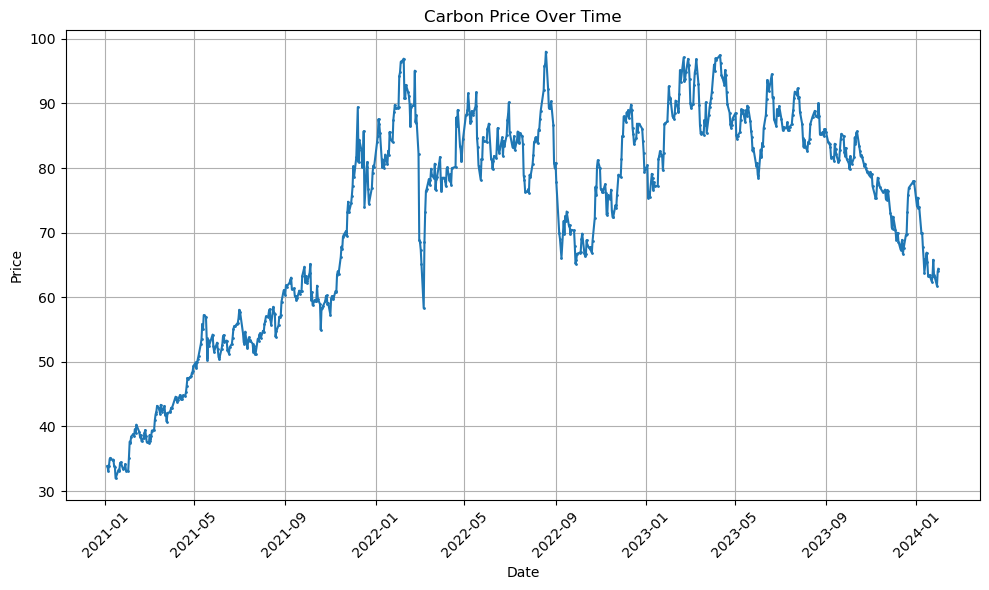

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Carbon'], marker='o', markersize=1, linestyle='-')
plt.title('Carbon Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [64]:
for column_name in df.columns[1:]:
    column = df[column_name]
    mean = column.mean()
    variance = column.var()
    sd = column.std()
    max_value = column.max()
    min_value = column.min()
    
    print(column_name)
    print("Mean:", mean)
    print("Variance:", variance)
    print("Standard Deviation:", sd)
    print("Maximum:", max_value)
    print("Minimum:", min_value)
    print()

Carbon
Mean: 72.98309305373526
Variance: 270.6564305779435
Standard Deviation: 16.45163914562751
Maximum: 98.01
Minimum: 31.96

Coal
Mean: 176.4729357798164
Variance: 8734.749716041804
Standard Deviation: 93.459882923326
Maximum: 439.0
Minimum: 63.75

Crude Oil
Mean: 83.81741808650057
Variance: 203.24808426985655
Standard Deviation: 14.256510241635452
Maximum: 127.98
Minimum: 51.09

Natural Gas
Mean: 72.44877326343381
Variance: 2982.6553067792283
Standard Deviation: 54.61369156886603
Maximum: 339.195
Minimum: 15.525

Fit_for_55
Mean: 0.8296199213630406
Variance: 0.14153620705668177
Standard Deviation: 0.376212980978437
Maximum: 1
Minimum: 0

Law
Mean: 0.21756225425950196
Variance: 0.1704523173135469
Standard Deviation: 0.4128587135008136
Maximum: 1
Minimum: 0

Compromise
Mean: 0.24508519003931847
Variance: 0.18526124601397334
Standard Deviation: 0.43041984853625576
Maximum: 1
Minimum: 0

EPU
Mean: 276.8771762858453
Variance: 4871.8912743413875
Standard Deviation: 69.79893462182204
Maxi

The descriptive statistics of our dataset from January 2021 to January 2024 reveal the carbon price's behavior during the EU ETS Phase 4, with a mean value of €72.98 and standard deviation indicating market volatility. The time series plot underscores these price fluctuations over the 763 observations. Complementing this, we observed varied patterns in related energy commodities and European stock indices, alongside weather variables that could influence emission levels and carbon market dynamics, all of which will be explored further in our econometric analysis.

# Section V Forcasting of Carbon Price

## 5.1 Evaluation Criteria

## 5.2 Parameter Determination

### ARIMA Model

##### AR(1)

In [65]:
y = df['Carbon']

modelAR1 = AutoReg(y, lags=1)
resultAR1 = modelAR1.fit()

print(resultAR1.summary())

                            AutoReg Model Results                             
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                     AutoReg(1)   Log Likelihood               -1631.975
Method:               Conditional MLE   S.D. of innovations              2.060
Date:                Sat, 24 Aug 2024   AIC                           3269.951
Time:                        16:04:50   BIC                           3283.859
Sample:                             1   HQIC                          3275.306
                                  763                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8752      0.339      2.578      0.010       0.210       1.541
Carbon.L1      0.9886      0.005    217.881      0.000       0.980       0.997
                                    Roots           

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [66]:
adf_result = adfuller(y)

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.496120
p-value: 0.116421
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [67]:
y_diff = y.diff().dropna()


modelAR1_diff = AutoReg(y_diff, lags=1)
resultAR1_diff = modelAR1_diff.fit()

print(resultAR1_diff.summary())

                            AutoReg Model Results                             
Dep. Variable:                 Carbon   No. Observations:                  762
Model:                     AutoReg(1)   Log Likelihood               -1632.661
Method:               Conditional MLE   S.D. of innovations              2.068
Date:                Sat, 24 Aug 2024   AIC                           3271.322
Time:                        16:04:50   BIC                           3285.226
Sample:                             1   HQIC                          3276.676
                                  762                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0428      0.075      0.571      0.568      -0.104       0.190
Carbon.L1     -0.0448      0.036     -1.236      0.216      -0.116       0.026
                                    Roots           

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


##### AR(2)

In [68]:
modelAR2 = AutoReg(y, lags=2)
resultAR2 = modelAR2.fit()

print(resultAR2.summary())

                            AutoReg Model Results                             
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                     AutoReg(2)   Log Likelihood               -1629.492
Method:               Conditional MLE   S.D. of innovations              2.059
Date:                Sat, 24 Aug 2024   AIC                           3266.983
Time:                        16:04:50   BIC                           3285.522
Sample:                             2   HQIC                          3274.122
                                  763                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8821      0.341      2.587      0.010       0.214       1.550
Carbon.L1      0.9469      0.036     26.151      0.000       0.876       1.018
Carbon.L2      0.0416      0.036      1.152      0.2

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [69]:
residuals = resultAR2.resid

if np.isnan(residuals).any() or np.isinf(residuals).any():
    residuals = residuals[~(np.isnan(residuals) | np.isinf(residuals))]

adf_test = adfuller(residuals)

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -12.798021
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [70]:
X = df.drop(columns=['Date','Carbon'])
_y = df['Carbon']

<Figure size 1000x600 with 0 Axes>

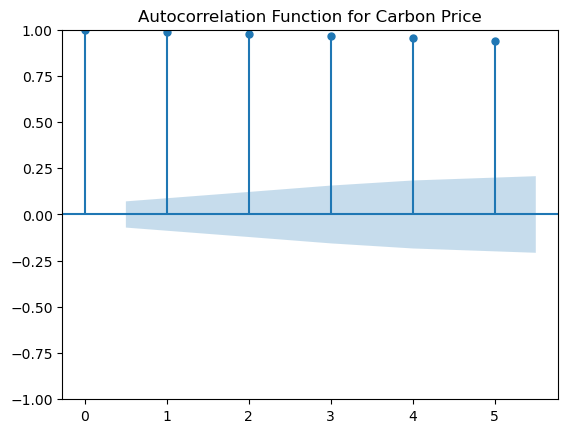

In [71]:
plt.figure(figsize=(10, 6))
plot_acf(df['Carbon'], lags=5, alpha=0.05)
plt.title('Autocorrelation Function for Carbon Price')
plt.show()

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

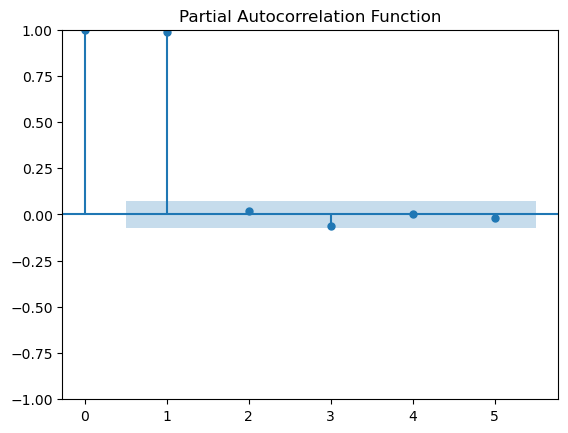

In [72]:
plt.figure(figsize=(10, 6))
plot_pacf(_y, lags=5, alpha=0.05)
plt.title('Partial Autocorrelation Function')
plt.show()

##### ARIMA(1,0,0)

In [73]:
model_arima100 = ARIMA(_y, exog=X, order=(1,0,0))
model_arima100_fit = model_arima100.fit()

print(model_arima100_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1663.504
Date:                Sat, 24 Aug 2024   AIC                           3367.008
Time:                        16:04:53   BIC                           3459.753
Sample:                             0   HQIC                          3402.716
                                - 763                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.3400     11.196      1.549      0.121      -4.605      39.284
Coal             -0.0035      0.007     -0.502      0.616      -0.017       0.010
Crude Oil         0.1825      0.041     

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


##### ARIMA(1,0,1)

In [74]:
model_arima101 = ARIMA(_y, exog=X, order=(1,0,1))
model_arima101_fit = model_arima101.fit()

print(model_arima101_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1681.078
Date:                Sat, 24 Aug 2024   AIC                           3404.155
Time:                        16:04:55   BIC                           3501.538
Sample:                             0   HQIC                          3441.649
                                - 763                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.3399     10.929      1.587      0.113      -4.081      38.761
Coal             -0.0206      0.007     -2.897      0.004      -0.035      -0.007
Crude Oil         0.2966      0.040     

##### ARIMA(1,1,0)

In [75]:
model_arima110 = ARIMA(_y, exog=X, order=(1,1,0))
model_arima110_fit = model_arima110.fit()

print(model_arima110_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1587.702
Date:                Sat, 24 Aug 2024   AIC                           3213.405
Time:                        16:04:57   BIC                           3301.488
Sample:                             0   HQIC                          3247.320
                                - 763                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Coal             -0.0032      0.007     -0.459      0.646      -0.017       0.010
Crude Oil         0.0446      0.036      1.241      0.215      -0.026       0.115
Natural Gas       0.0136      0.008     

##### ARIMA(1,1,1); Best Performing Model

In [76]:
model_arima111 = ARIMA(_y, exog=X, order=(1,1,1))
model_arima111_fit = model_arima111.fit()

print(model_arima111_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1585.450
Date:                Sat, 24 Aug 2024   AIC                           3210.900
Time:                        16:05:00   BIC                           3303.619
Sample:                             0   HQIC                          3246.600
                                - 763                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Coal             -0.0039      0.008     -0.514      0.607      -0.019       0.011
Crude Oil         0.0394      0.036      1.101      0.271      -0.031       0.110
Natural Gas       0.0156      0.008     

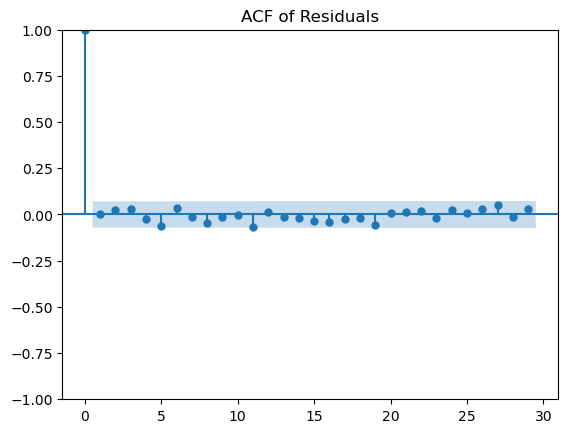

In [77]:
model_fit = model_arima111.fit()

# Get the residuals
residuals = model_fit.resid

# Plot the ACF of residuals
plot_acf(residuals, alpha=0.05)
plt.title('ACF of Residuals')
plt.show()

##### ARIMA(2,0,0)

In [78]:
model_arima200 = ARIMA(_y, exog=X, order=(2,0,0))
model_arima200_fit = model_arima200.fit()

print(model_arima200_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1665.401
Date:                Sat, 24 Aug 2024   AIC                           3372.801
Time:                        16:05:06   BIC                           3470.184
Sample:                             0   HQIC                          3410.295
                                - 763                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.3399     11.187      1.550      0.121      -4.586      39.266
Coal              0.0043      0.007      0.626      0.531      -0.009       0.018
Crude Oil         0.2223      0.042     

##### ARIMA(2,1,0)

In [79]:
model_arima210 = ARIMA(_y, exog=X, order=(2,1,0))
model_arima210_fit = model_arima210.fit()

print(model_arima210_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1585.258
Date:                Sat, 24 Aug 2024   AIC                           3210.515
Time:                        16:05:08   BIC                           3303.234
Sample:                             0   HQIC                          3246.215
                                - 763                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Coal             -0.0039      0.008     -0.519      0.604      -0.019       0.011
Crude Oil         0.0434      0.035      1.226      0.220      -0.026       0.113
Natural Gas       0.0153      0.008     

##### ARIMA(2,0,1)

In [80]:
model_arima201 = ARIMA(_y, exog=X, order=(2,0,1))
model_arima201_fit = model_arima201.fit()

print(model_arima201_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1662.953
Date:                Sat, 24 Aug 2024   AIC                           3369.905
Time:                        16:05:10   BIC                           3471.925
Sample:                             0   HQIC                          3409.184
                                - 763                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            17.3399     11.392      1.522      0.128      -4.988      39.668
Coal              0.0048      0.007      0.641      0.522      -0.010       0.019
Crude Oil         0.2188      0.042     

##### ARIMA(2,1,1)

In [81]:
model_arima211 = ARIMA(_y, exog=X, order=(2,1,1))
model_arima211_fit = model_arima211.fit()

print(model_arima211_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  763
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1585.250
Date:                Sat, 24 Aug 2024   AIC                           3212.500
Time:                        16:05:14   BIC                           3309.855
Sample:                             0   HQIC                          3249.985
                                - 763                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Coal             -0.0040      0.008     -0.515      0.607      -0.019       0.011
Crude Oil         0.0425      0.036      1.176      0.240      -0.028       0.113
Natural Gas       0.0153      0.008     

### Random Forest

## 5.3 Performance and Results

### ARIMA Model

In [82]:
X = df.drop(['Date', 'Carbon'], axis=1)
y = df['Carbon']

In [83]:
train_size = int(len(df) * 0.8)
train_indices = df.index[:train_size]
test_indices = df.index[train_size:]

y_train, y_test = y.loc[train_indices], y.loc[test_indices]
X_train, X_test = X.loc[train_indices], X.loc[test_indices]

In [84]:
model_arima111 = ARIMA(y_train, exog=X_train, order=(1,1,1))
model_arima111_fit = model_arima111.fit()

print(model_arima111_fit.summary())

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Carbon   No. Observations:                  610
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1295.332
Date:                Sat, 24 Aug 2024   AIC                           2630.664
Time:                        16:05:17   BIC                           2718.900
Sample:                             0   HQIC                          2664.990
                                - 610                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Coal             -0.0048      0.008     -0.577      0.564      -0.021       0.012
Crude Oil         0.0462      0.041      1.128      0.259      -0.034       0.127
Natural Gas       0.0134      0.009     

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### In Sample

In [85]:
y_train_pred = model_arima111_fit.predict(in_sample=True, exog=X_train, return_conf_int=False)

In [86]:
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f"RMSE: {rmse}")

RMSE: 2.230822306935615


In [87]:
y_train_reshaped = y_train.values.reshape(-1, 1)
y_train_pred_reshaped = y_train_pred.values.reshape(-1, 1)

reg = linear_model.LinearRegression()

reg.fit(y_train_pred_reshaped, y_train_reshaped)

LinearRegression()

In [88]:
r_squared = reg.score(y_train_pred_reshaped, y_train_reshaped)
r_squared

0.9841367941145708

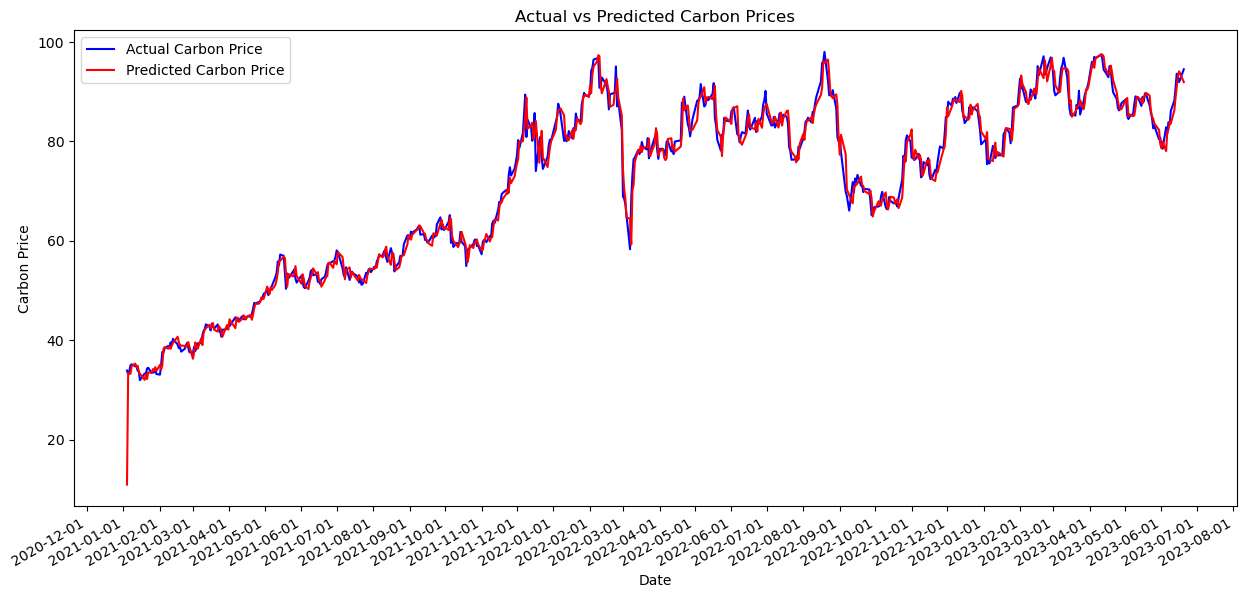

In [89]:
dates = df['Date']
date_train = dates[train_indices]

plt.figure(figsize=(15, 7))
plt.plot(date_test, y_train, label='Actual Carbon Price', color='blue')
plt.plot(date_test, y_train_pred, label='Predicted Carbon Price', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format for date rotation and readability
plt.title('Actual vs Predicted Carbon Prices')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.show()

#### Out of Sample

In [95]:
# Perform out-of-sample test with daily actual data updates
y_pred_test = []  # Store predictions
history = y_train.tolist()  # Initialize with training data
exog_history = X_train.values.tolist()

# Loop through test set to predict each day and update with actual data
for t in range(len(y_test)):
    X_input = X_test.iloc[t].values.reshape(1, -1)  # Exogenous variables for day t
    model = ARIMA(history, exog=exog_history, order=(1,1,1))
    model_fit = model.fit()
    
    # Predict the next value
    forecast = model_fit.forecast(exog=X_input)
    y_pred_test.append(forecast[0])
    
    # Update history with actual data for next iteration
    history.append(y_test.iloc[t])
    exog_history.append(X_input[0])

C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Erica Zhao\anaconda3\envs\honorthesis\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Eri

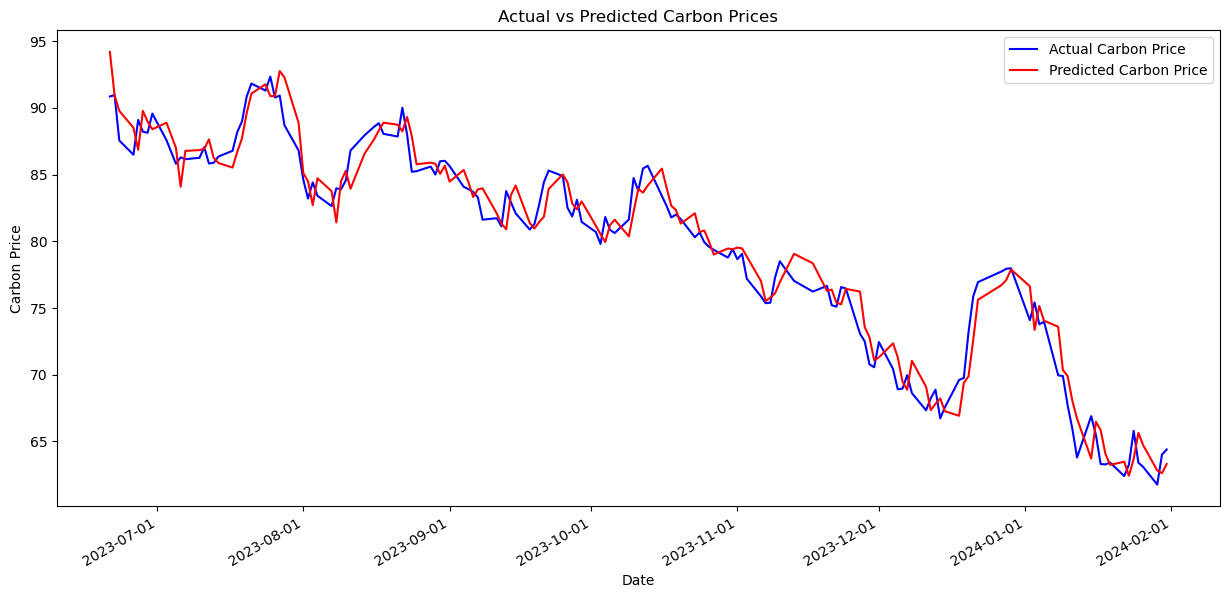

In [99]:
dates = df['Date']
date_test = dates[test_indices]

plt.figure(figsize=(15, 7))
plt.plot(date_test, y_test, label='Actual Carbon Price', color='blue')
plt.plot(date_test, y_pred_test, label='Predicted Carbon Price', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format for date rotation and readability
plt.title('Actual vs Predicted Carbon Prices')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.show()

In [100]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Out-of-Sample RMSE: {rmse}")

Out-of-Sample RMSE: 1.534270200411023


### Random Forest

##### Times Series Random Forest

In [ ]:
result = adfuller(df['Carbon'])
print('p-value: %f' % result[1])

In [ ]:
df['log_value'] = np.log(df['Carbon'])

df['diff_log_value'] = df['log_value'].diff().dropna()

result = adfuller(df['diff_log_value'].dropna())
print('p-value: %f' % result[1])

In [ ]:
df = df.dropna().reset_index(drop=True)

train_size = int(len(df) * 0.8)
train_indices = df.index[:train_size]
test_indices = df.index[train_size:]

X_train, X_test = df.loc[train_indices, df.columns.difference(['Date', 'Carbon', 'log_value', 'diff_log_value'])], df.loc[test_indices, df.columns.difference(['Date', 'Carbon', 'log_value', 'diff_log_value'])]
y_train, y_test = df['diff_log_value'].loc[train_indices], df['diff_log_value'].loc[test_indices]

In [ ]:
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)

In [ ]:
initial_log_value = df['log_value'].iloc[0]

cumulative_log_value_pred = initial_log_value + np.cumsum(y_train_pred)

predicted_carbon_train = np.exp(cumulative_log_value_pred)

actual_carbon_train = np.exp(df['log_value'].loc[train_indices])

In [ ]:
rmse_original_scale = np.sqrt(mean_squared_error(actual_carbon_train[1:], predicted_carbon_train[1:]))
print("In-sample RMSE (original scale):", rmse_original_scale)

In [ ]:
y_train_actual_reshaped = np.array(y_train).reshape(-1, 1)  # Make sure y_train is the actual values array
y_train_pred_reshaped = np.array(y_train_pred).reshape(-1, 1)  # y_train_pred as predicted values from your model

# Create and fit the Linear Regression model
reg = linear_model.LinearRegression()
reg.fit(y_train_pred_reshaped, y_train_actual_reshaped)

# Calculate the R-squared value
r_squared = r2_score(y_train_actual_reshaped, y_train_pred_reshaped)
print("R-squared:", r_squared)

In [ ]:
train_dates = df['Date'].iloc[train_indices].reset_index(drop=True)

plt.figure(figsize=(15, 7))
plt.plot(train_dates[1:], actual_carbon_train[1:], label='Actual Carbon Price', color='blue')
plt.plot(train_dates[1:], predicted_carbon_train[1:], label='Predicted Carbon Price', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format for date rotation and readability
plt.title('Actual vs Predicted Carbon Prices')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.show()

In [ ]:
feature_importances = rf_model.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

features_df = features_df.sort_values(by='Importance', ascending=False)

print(features_df)

### LSTM Model

In [ ]:
# Normalize features
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))

# Assuming 'features' and 'target' are already defined as:
features = df.drop(['Date', 'Carbon', 'log_value', 'diff_log_value'], axis=1)
target = df['Carbon']

features_scaled = scaler_features.fit_transform(features)
target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1))

# Calculate the split point
train_size = int(len(features_scaled) * 0.8)
test_size = len(features_scaled) - train_size

# Split the data into training and testing sets
X_train, X_test = features_scaled[:train_size], features_scaled[train_size:]
y_train, y_test = target_scaled[:train_size], target_scaled[train_size:]

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))  # return full sequence
model.add(LSTM(50))  # Now this LSTM can handle the input shape
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=72, verbose=1)

In [ ]:
# Make predictions
y_train_pred = model.predict(X_train)

# Inverse transform predictions and actual values for accurate error measurement
y_train_pred = scaler_target.inverse_transform(y_train_pred)  # Predictions back to original scale
y_train_original = scaler_target.inverse_transform(y_train)  # Actual values back to original scale

# Calculate RMSE
from sklearn.metrics import mean_squared_error
train_rmse = np.sqrt(mean_squared_error(y_train_original, y_train_pred))
print('Train RMSE:', train_rmse)

In [ ]:
y_train_reshaped = y_train.reshape(-1, 1)
y_train_pred_reshaped = y_train_pred.reshape(-1, 1)

reg = linear_model.LinearRegression()
reg.fit(y_train_pred_reshaped, y_train_reshaped)

In [ ]:
r_squared = reg.score(y_train_pred_reshaped, y_train_reshaped)
r_squared

In [ ]:
# Correct extraction of dates for the training set
train_dates = df['Date'].iloc[train_indices].reset_index(drop=True)

# Reshape y_train_pred if necessary (flattening if it comes out with an extra dimension)
y_train_pred_flat = y_train_pred.flatten()  # Assuming y_train_pred might be coming as (n, 1) from LSTM

plt.figure(figsize=(15, 7))
plt.plot(train_dates, y_train_original, label='Actual Carbon Price', color='blue')
plt.plot(train_dates, y_train_pred_flat, label='Predicted Carbon Price', color='red')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # Auto-format for date rotation and readability
plt.title('Actual vs Predicted Carbon Prices')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor


param_grid = {
    'batch_size': [1, 2, 3, 4, 5],
    'epochs': [10, 50, 100],
    'optimizer': ['sgd', 'rmsprop', 'adagrad', 'adadelta', 'adam', 'adamax', 'nadam']
}


grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3, scoring='neg_mean_squared_error')
grid_result = grid.fit(X_train, y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


## 5.4 Discussion

# Section VI Conclusion